In [237]:
import pandas as pd

In [238]:
df = pd.read_csv("../data/parsed_logs.csv")

In [239]:
df[df["hostname"] == "carolp20003"]

,start_dt,config,ecc,hostname,logfile,it,ker_time,acc_time,ker_err,acc_err,sdc,critical_sdc
1204,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,4502,0.034874,0.000000,8,3016,1,0
1205,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,2,0.041432,0.000000,5,5,1,0
1206,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,3,0.038514,0.000000,1,6,1,0
1207,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,5,0.038118,0.000000,7,13,1,0
1208,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,8,0.038179,0.000000,3,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41224,2022-12-11 18:36:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_11_18_36_41_c10_res44_test_01_bn-relu_...,7,0.038149,0.000000,5,56,1,0
41225,2022-12-11 18:36:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_11_18_36_41_c10_res44_test_01_bn-relu_...,9,0.038110,0.000000,7,63,1,0
41226,2022-12-11 18:36:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_11_18_36_41_c10_res44_test_01_bn-relu_...,10,0.038240,1.043624,7,70,1,0
41227,2022-12-10 19:51:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_10_19_51_41_c10_res44_test_01_bn-relu_...,1,0.156552,0.000000,10,10,1,0


In [240]:
configs = dict(
    # Baseline C100
    BaseC100="c100_res44_test_01_bn-relu_base.yaml",
    # "c100_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C100
    OrderInvC100="c100_res44_test_02_relu6-bn.yaml",
    # "c100_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C100="c100_res44_test_02_bn-relu6_base.yaml",
    BnRelu6C100="c100_res44_test_02_bn-relu6.yaml",
    # Order inversion + nan filter + Relu6
    OrderINanRelu6C100="c100_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C100
    GeluNanC100="c100_res44_test_02_gelu6_nans.yaml",

    # Baseline C10
    BaseC10="c10_res44_test_01_bn-relu_base.yaml",
    # "c10_res44_test_02_bn-relu6.yaml",
    BnRelu6C10="c10_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C10
    OrderInvC10="c10_res44_test_02_relu6-bn.yaml",
    # "c10_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C10="c10_res44_test_02_bn-relu6_base.yaml",
    OrderINanRelu6C10="c10_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C10
    GeluNanC10="c10_res44_test_02_gelu6_nans.yaml",

    MobileNetC100="cifar100_mobilenetv2_x1_4.yaml",
    MobileNetC10="cifar10_mobilenetv2_x1_4.yaml",

    Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    # Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    DeepLabV3="deeplabv3_resnet50_base",
    ViTPatch16_224="vit_base_patch16_224",
    ViTPatchSam32_224="vit_base_patch32_224_sam",
    ViTPatch32_224="vit_base_patch32_384",
)
configs_inv = {v.replace(".yaml", ""): k for k, v in configs.items()}

In [241]:
configs_df = pd.DataFrame([configs]).T.reset_index().rename(columns={0: "YAML", "index": "config"})

In [242]:
configs_df

,config,YAML
0,BaseC100,c100_res44_test_01_bn-relu_base.yaml
1,OrderInvC100,c100_res44_test_02_relu6-bn.yaml
2,BaseBnRelu6C100,c100_res44_test_02_bn-relu6_base.yaml
3,BnRelu6C100,c100_res44_test_02_bn-relu6.yaml
4,OrderINanRelu6C100,c100_res44_test_02_relu6-bn_nanfilter.yaml
5,GeluNanC100,c100_res44_test_02_gelu6_nans.yaml
6,BaseC10,c10_res44_test_01_bn-relu_base.yaml
7,BnRelu6C10,c10_res44_test_02_bn-relu6.yaml
8,OrderInvC10,c10_res44_test_02_relu6-bn.yaml
9,BaseBnRelu6C10,c10_res44_test_02_bn-relu6_base.yaml


In [243]:
df["config"] = df["config"].apply(lambda x: configs_inv[x])

In [244]:
df["count"] = 1

In [245]:
to_save = df.groupby(["hostname", "config", "ecc"]).sum()

In [246]:
to_save

it     ker_time      acc_time  \
hostname    config               ecc                                        
carola20001 BaseC100             OFF    429533     8.467331   3466.376501   
                                 ON      23157     0.142163    315.250233   
carolm20004 Resnet50ImagenetBase OFF      6142    60.433988   1854.429548   
            ViTPatch16_224       OFF      1397  1057.161100   3400.316663   
            ViTPatch32_224       OFF      1526   771.979889   1400.998486   
            ViTPatchSam32_224    OFF     12962   220.615607   1895.187901   
carolp20002 BaseBnRelu6C10       OFF   1367561    13.136374   9732.987719   
            BaseBnRelu6C100      OFF  12461324   126.080372  22744.062804   
            BaseC10              OFF    315910     0.867422    418.567306   
            BaseC100             OFF   3853800    58.007232  18513.751907   
            BnRelu6C100          OFF   6727720   158.400545   8020.148988   
            GeluNanC100          OFF    492795    41.277537   3508.435308   
            OrderINanRelu6C100   OFF   5215543    74.995140  26719.312400   
            OrderInvC100         OFF   3024340    92.303616   4247.659699   
carolp20003 BaseBnRelu6C10       OFF   1062124    18.912505  13609.829234   
            BaseC10              OFF  10518719   328.480168  13168.168211   
            BnRelu6C10           OFF  75519967   246.053634   3830.596582   
            DeepLabV3            OFF       533   411.133467   1056.131899   
            GeluNanC10           OFF  43597589   332.959881   4993.979719   
            OrderINanRelu6C10    OFF    739228     6.600515   8366.615890   
            OrderInvC10          OFF   7564454   404.898822   1432.586634   

                                      ker_err    acc_err    sdc  critical_sdc  \
hostname    config               ecc                                            
carola20001 BaseC100             OFF   101193    1565798    433            23   
                                 ON      4566       4568     10             1   
carolm20004 Resnet50ImagenetBase OFF    91682     146782    105            27   
            ViTPatch16_224       OFF   136474     356576    197            17   
            ViTPatch32_224       OFF    67626     324832    198             7   
            ViTPatchSam32_224    OFF    43609     187353    261            12   
carolp20002 BaseBnRelu6C10       OFF    20292      86597    337             7   
            BaseBnRelu6C100      OFF   869341   47139799   1770            14   
            BaseC10              OFF      279       4464     31             0   
            BaseC100             OFF   363524   11251915   1839            38   
            BnRelu6C100          OFF  8339228  648546098   3660            23   
            GeluNanC100          OFF  1265249    4704752    873             6   
            OrderINanRelu6C100   OFF   689474    8551829   1785            23   
            OrderInvC100         OFF   507373   18446340   1357             5   
carolp20003 BaseBnRelu6C10       OFF   403260    9709744    476           317   
            BaseC10              OFF   273075   22226880   8839           218   
            BnRelu6C10           OFF    56648   48254300   7878             1   
            DeepLabV3            OFF     2320       3776    145             0   
            GeluNanC10           OFF    79355   26414410   9627             2   
            OrderINanRelu6C10    OFF     4964      27723    101             7   
            OrderInvC10          OFF    46508    7620172  12959             1   

                                      count  
hostname    config               ecc         
carola20001 BaseC100             OFF    433  
                                 ON      10  
carolm20004 Resnet50ImagenetBase OFF    105  
            ViTPatch16_224       OFF    197  
            ViTPatch32_224       OFF    198  
            ViTPatchSam32_224    OFF    261  
carolp20002 BaseBnRelu6C10       OFF    

In [247]:
sdc_rate = to_save[["acc_time", "sdc", "critical_sdc"]].copy()
sdc_rate["sdc_rate"] = sdc_rate["sdc"] / sdc_rate["acc_time"]
sdc_rate["critical_sdc_rate"] = sdc_rate["critical_sdc"] / sdc_rate["acc_time"]

In [261]:
sdc_rate

acc_time    sdc  critical_sdc  \
hostname    config               ecc                                      
carola20001 BaseC100             OFF   3466.376501    433            23   
                                 ON     315.250233     10             1   
carolm20004 Resnet50ImagenetBase OFF   1854.429548    105            27   
            ViTPatch16_224       OFF   3400.316663    197            17   
            ViTPatch32_224       OFF   1400.998486    198             7   
            ViTPatchSam32_224    OFF   1895.187901    261            12   
carolp20002 BaseBnRelu6C10       OFF   9732.987719    337             7   
            BaseBnRelu6C100      OFF  22744.062804   1770            14   
            BaseC10              OFF    418.567306     31             0   
            BaseC100             OFF  18513.751907   1839            38   
            BnRelu6C100          OFF   8020.148988   3660            23   
            GeluNanC100          OFF   3508.435308    873             6   
            OrderINanRelu6C100   OFF  26719.312400   1785            23   
            OrderInvC100         OFF   4247.659699   1357             5   
carolp20003 BaseBnRelu6C10       OFF  13609.829234    476           317   
            BaseC10              OFF  13168.168211   8839           218   
            BnRelu6C10           OFF   3830.596582   7878             1   
            DeepLabV3            OFF   1056.131899    145             0   
            GeluNanC10           OFF   4993.979719   9627             2   
            OrderINanRelu6C10    OFF   8366.615890    101             7   
            OrderInvC10          OFF   1432.586634  12959             1   

                                      sdc_rate  critical_sdc_rate  
hostname    config               ecc                               
carola20001 BaseC100             OFF  0.124914           0.006635  
                                 ON   0.031721           0.003172  
carolm20004 Resnet50ImagenetBase OFF  0.056621           0.014560  
            ViTPatch16_224       OFF  0.057936           0.005000  
            ViTPatch32_224       OFF  0.141328           0.004996  
            ViTPatchSam32_224    OFF  0.137717           0.006332  
carolp20002 BaseBnRelu6C10       OFF  0.034625           0.000719  
            BaseBnRelu6C100      OFF  0.077823           0.000616  
            BaseC10              OFF  0.074062           0.000000  
            BaseC100             OFF  0.099332           0.002053  
            BnRelu6C100          OFF  0.456351           0.002868  
            GeluNanC100          OFF  0.248829           0.001710  
            OrderINanRelu6C100   OFF  0.066806           0.000861  
            OrderInvC100         OFF  0.319470           0.001177  
carolp20003 BaseBnRelu6C10       OFF  0.034975           0.023292  
            BaseC10              OFF  0.671240           0.016555  
            BnRelu6C10           OFF  2.056599           0.000261  
            DeepLabV3            OFF  0.137293           0.000000  
            GeluNanC10           OFF  1.927721           0.000400  
            OrderINanRelu6C10    OFF  0.012072           0.000837  
            OrderInvC10          OFF  9.045875           0.000698

<AxesSubplot: ylabel='config,ecc'>

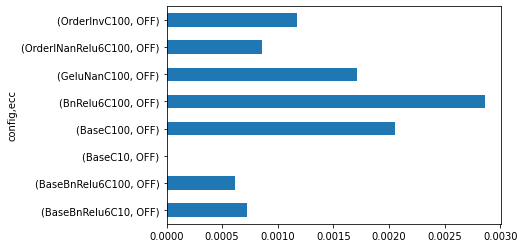

In [249]:
sdc_rate.loc["carolp20002"]["critical_sdc_rate"].plot.barh()